In [11]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#from vega_datasets import data
import seaborn as sns
import scipy.stats as st
sns.set()

In [12]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [56]:
# Carregando dataset com os alunos de matematica
students_math = pd.read_csv('../databases/student-mat.zip', compression='zip')
students_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [62]:
# Carregando dataset com os alunos de portugues
students_por = pd.read_csv('../databases/student-por.zip', compression='zip')
students_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [63]:
# Unindo os dois datasets com base na informacao de alunos repetidos com os atributos para o merge fornecidos na base de dados
students = pd.merge(students_math, students_por, how='inner', on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'reason', 'nursery', 'internet'], suffixes=('_math', '_por'))
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [75]:
students=pd.merge(students_math, students_por, how='inner', on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'reason', 'nursery', 'internet'], suffixes=('_math', '_por'))

Queremos prever qual será a nota final de português de um aluno com base em sua nota de matemática do primeiro período

Para isso, primeiramente esboçamos o gráfico dos alunos em que o eixo x é a nota de matemática do primeiro período e o eixo y representa a nota final em português

<AxesSubplot:xlabel='Nota de matemática do primeiro período', ylabel='Nota final de português'>

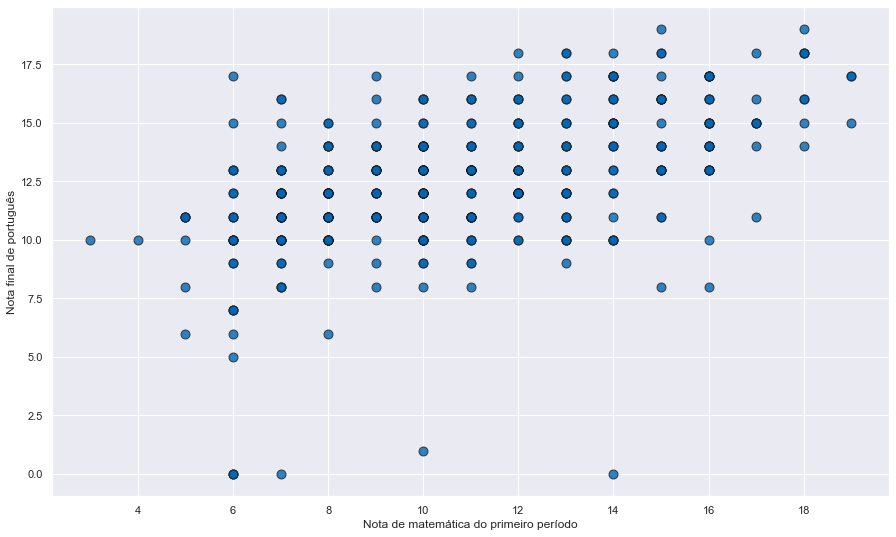

In [99]:
students.plot.scatter(x='G1_math', y='G3_por', xlabel='Nota de matemática do primeiro período', ylabel='Nota final de português', alpha=0.8, edgecolors='k', s=80,  c=np.array([0, 0.4, 0.7]).reshape(1,-1))

### Regressão Linear

Agora, fazemos uma regressão linear, isto é, determinamos as constantes $\alpha$ e $\beta$ para uso em um modelo linear a fim de prever $y$, que representa a nota final em português, em função da nota $x$ de matemática no primeiro período. Assim, a reta será: $y = \alpha + \beta x$
E determinamos valores ótimos de $\alpha$ e $\beta$ através das fórmulas:

$$\alpha = \bar{y} - \beta\,\bar{x}\\$$
$$\beta = \frac{ \operatorname{Cov}(x, y) }{ \operatorname{Var}(x)}$$

In [103]:
def predict(alpha, beta, x_i):
    return alpha + beta*x_i

def linear_regression(x, y):
    beta = np.cov(x, y)[0][1]/np.var(x, ddof=1)
    alpha = y.mean() - beta*x.mean()
    return (alpha, beta)

Text(0.5, 1.0, 'Regressão linear simples')

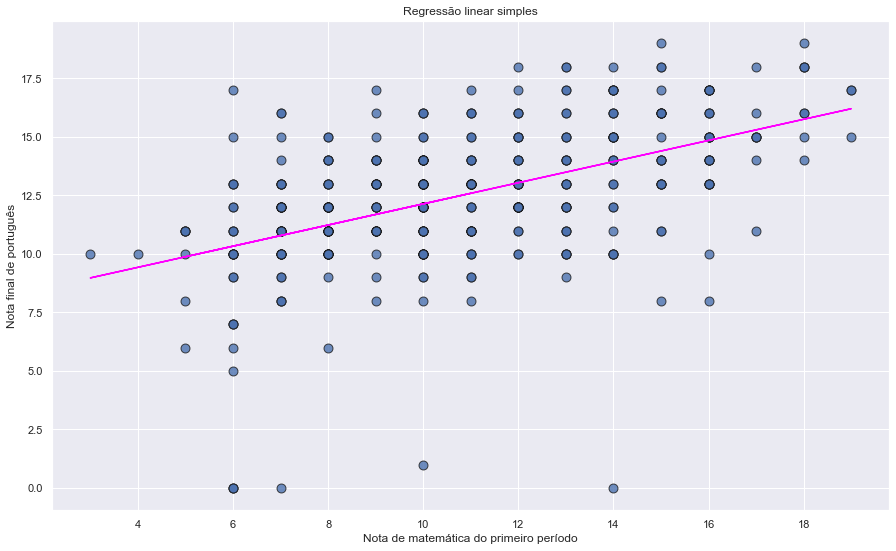

In [105]:
x = students['G1_math'].values
y = students['G3_por'].values

alpha, beta = linear_regression(x, y)

x_nn = x
y_nn = np.array([predict(alpha, beta, x[i]) for i in range(len(x))])
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_nn, y_nn, color='magenta')
plt.xlabel('Nota de matemática do primeiro período')
plt.ylabel('Nota final de português')
plt.title('Regressão linear simples')

In [108]:
print(f'Valor de alpha: {alpha}')
print(f'Valor de beta: {beta}')

Valor de alpha: 7.620290486708863
Valor de beta: 0.4517467832839723


### Avaliação do modelo

Agora devemos verificar o quão bom é o modelo de linear encontrado, para tanto, utilizados a métrica do R-quadrado, que possui a seguinte fórmula:
$$R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}$$

In [109]:
def r_squared(alpha, beta, x, y):
  y_ = y.mean()
  y_hat = np.array([predict(alpha, beta, x[i]) for i in range(len(x))])
  return 1 - sum([(y[i]-y_hat[i])**2 for i in range(len(x))])/sum([(y[i]-y_)**2 for i in range(len(x))])

In [112]:
R2 = r_squared(alpha, beta, x, y)
print(f'O R-quadrado é {R2}')

O R-quadrado é 0.2673537611953001


### Conclusão

No Final, obtivemos um valor baixo de $R^2$, o que indica que o nosso modelo não é muito bom para a previsão à qual se prorpõe, e devem existir outros fatores que influenciam a nota final de português do aluno, de fato, não é esperado que as notas de matemática e português possuam uma correlação tão forte